# Prompt Explorer

This is a notebook for exploring prompts and seeds. Random seeds are generated and displayed. The idea is to have this running alongside other more complicated notebooks, but this one doesn't needs to have gdrive connection. Then when finding cool prompt/seed combos, but them in the prompts google sheet and have those more complex notebooks reference the sheet vs defining prompts as variables in the code. 

In [5]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
from IPython.display import clear_output

drive.mount('/content/gdrive')

song_name = 'emit' #@param {type:"string"}

code_folder = '/content/gdrive/MyDrive/AI-Art'

fp = os.path.join(code_folder, 'input_data.xlsx')
df_prompt = pd.read_excel(fp, 'prompts_{}'.format(song_name), index_col=0).dropna(how='all')
df_prompt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,prompt,seeds,guidance_scale
name,,,
forest_fractal,art nouveau paisley forest green trees towerin...,NaN,7.5
ent_goddess,"goddess of forest, ent, treebeard, Greg Rutkow...",NaN,7.5


In [6]:
%%capture
!pip install diffusers
!pip install transformers scipy ftfy accelerate

import torch
from diffusers import StableDiffusionPipeline

In [7]:

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               torch_dtype=torch.float16,
                                               safety_checker=None
                                               )  


pipe = pipe.to("cuda")

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
df_prompt.tail()

,prompt,seeds,guidance_scale
name,,,
rainbow spiral wave2,"fractal rainbow, standing waves, electron wave...",1011141381797677 3247564695245070 844555980572...,50.0
rainbow spiral wave3,"fractal rainbow, standing waves, electron wave...",6565130727997329,50.0
rainbow spiral wave4,"fractal rainbow, standing waves, electron wave...",6606829181220414,7.5
rainbow spiral wave5,"electron wave function, exciton, electron orbi...",4476547043696287 1727166619442474 311681086914...,7.5
sea robots,"army of various robot sea monsters, catapults ...",1,7.5


Seeds: [2667037324659544, 4882359570249662, 426869046215691, 8878331056240656]


  0%|          | 0/50 [00:00<?, ?it/s]

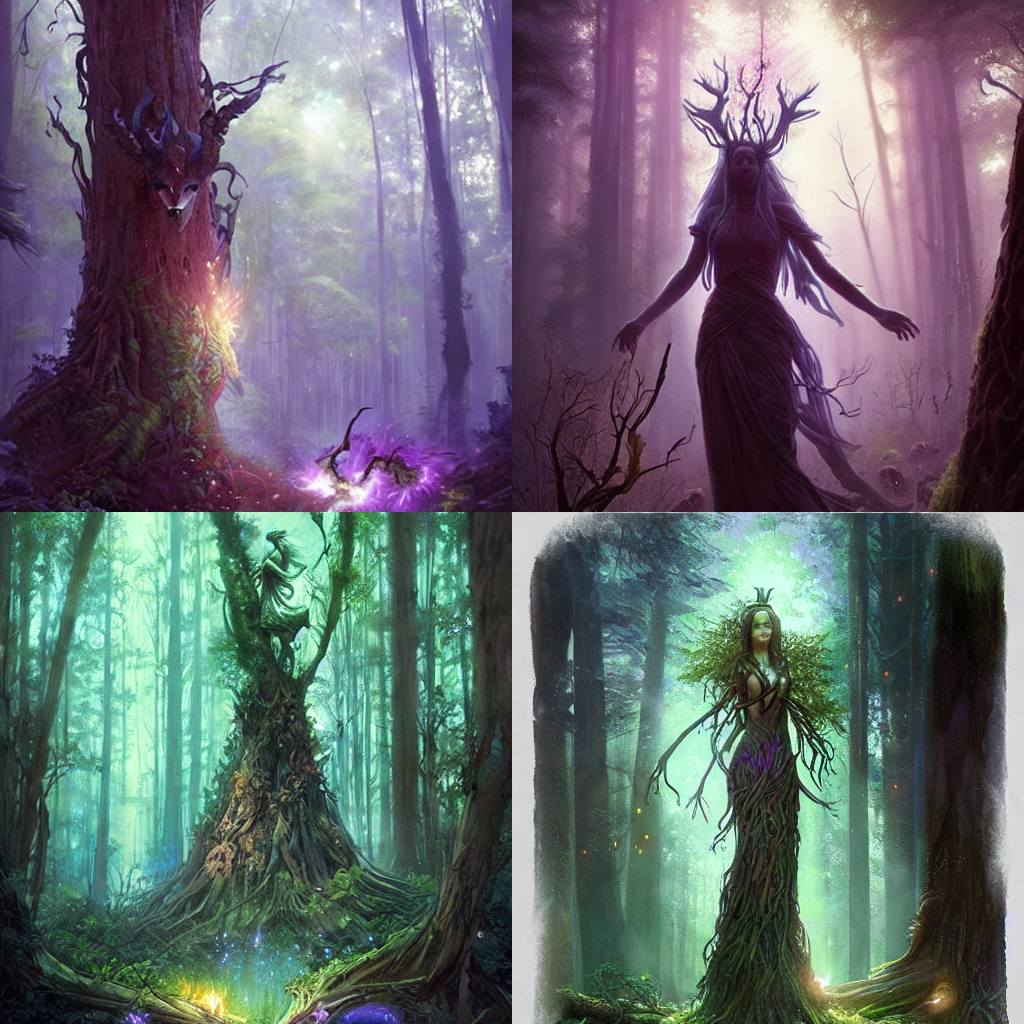

In [10]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


# # https://huggingface.co/docs/diffusers/using-diffusers/reusing_seeds

prompt_name = 'ent_goddess'
prompt = df_prompt['prompt'][prompt_name]
guidance_scale = float(df_prompt['guidance_scale'][prompt_name])


# prompt = """

# """

# rows X cols of images. Reduce for speed and memory issues. 
rows = 2
cols = 2

num_images = rows*cols

# Make new random seeds in a hacky way. TODO: probably a function to generate seeds without making a generator instance. 

generator = torch.Generator(device="cuda")
seeds = [generator.seed() for i in range(num_images)]
generator = [torch.Generator(device="cuda").manual_seed(seed) for seed in seeds]

print("Seeds: {}".format(seeds))

images = pipe(prompt, generator=generator, num_images_per_prompt=rows*cols).images

image_grid(images, rows=rows, cols=cols)